## Engineer labels of categorical variables

In this section, I will describe a variety of methods to transform the strings of categorical variables into numbers, so that we can feed these variables in machine learning algorithms using sklearn.

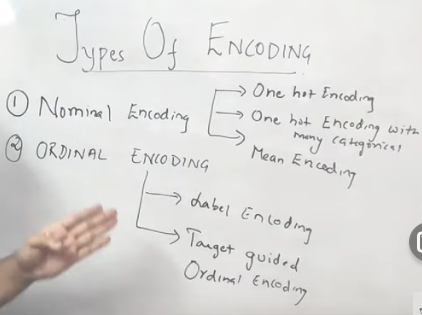



## One Hot Encoding

One hot encoding, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation.

Each one of the boolean variables are also known as **dummy variables** or binary variables.

For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise. 

For binary case ( Gender ) - we can use label encoding because the possible values are 0,1 
But if more than 2 binary value - if we use label encoding 0,1,2 - Machine learning algo consider 2 is highest.
So always go for On hot encoding if the cat is more than two


See below:


In [1]:
import pandas as pd

data = pd.read_csv('titanic.csv', usecols=['Sex'])
data.head()

,Sex
0,male
1,female
2,female
3,female
4,male


#### Dummy Drop

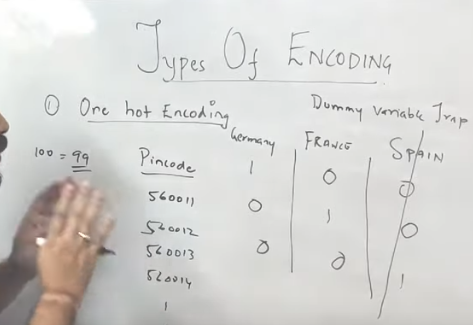

In [2]:
# one hot encoding

pd.get_dummies(data).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [3]:
# for better visualisation
pd.concat([data, pd.get_dummies(data)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


#### Dunmmy Drop - Example

As you may have noticed, we only need 1 of the 2 dummy variables to represent the original categorical variable Sex. Any of the 2 will suffice, and it doesn't matter which one we select, since they are equivalent.



Therefore, to encode a categorical variable with 2 labels, we need 1 dummy variable. 

To extend this concept, to encode  categorical variable with k labels, we need k-1 dummy variables.

How can we get this using pandas?

In [4]:
# obtaining k-1 labels
pd.get_dummies(data, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [5]:
# Let's now look at an example with more than 2 labels

data=pd.read_csv('titanic.csv', usecols=['Embarked'])
data.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [6]:
# check the number of different labels
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
# get whole set of dummy variables

pd.get_dummies(data).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
# After dummy drop
# get k-1 dummy variables

pd.get_dummies(data, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [9]:
# we can also add an additional dummy variable to indicate whether there was missing data

pd.get_dummies(data, drop_first=True, dummy_na=True).head()

,Embarked_Q,Embarked_S,Embarked_nan
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [10]:
# by summing the number of 1s per boolean variable over the rows of the dataset, we get to know how
# many observations we have for each variable (i.e., each category)

pd.get_dummies(data, drop_first=True, dummy_na=True).sum(axis=0)

Embarked_Q       77
Embarked_S      644
Embarked_nan      2
dtype: int64

### Notes

Both pandas and sklearn will provide a whole set of dummy variables from a categorical variable. This is, instead of returning k-1 binary variables, they will return k, with the option in pandas of dropping the first binary variable and obtain k-1.

### When should you use k and when k-1?

When the original variable is binary, that is, when the original variable has only 2 labels, then you should create **one and only one** binary variable.

When the original variable has more than 2 labels, the following is important:

#### One hot encoding into k-1:
One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (removed) binary variable. As an example, for the variable gender encoded into male, if the observation is 0, then it has to be female. We do not need the additional female variable to explain that. 

One hot encoding with k-1 binary variables should be used in linear regression, to keep the correct number of degrees of freedom (k-1). The linear regression has access to all of the features as it is being trained, and therefore examines altogether the whole set of dummy variables. This means that k-1 binary variables give the whole information about (represent completely) the original categorical variable to the linear regression.

And the same is true for all machine learning algorithms that look at ALL the features at the same time during training. For example, support vector machines and neural networks as well. And clustering algorithms.

#### One hot encoding into k dummy variables

However, tree based models select at each iteration only a group of features to make a decision. This is to separate the data at each node. Therefore, the last category, the one that was removed in the one hot encoding into k-1 variables, would only be taken into account by those splits or even trees, that use the entire set of binary variables at a time. And this would rarely happen, because each split usually uses 1-3 features to make a decision. So, tree based methods will never consider that additional label, the one that was dropped. Thus, if the categorical variables will be used in a tree based learning algorithm, it is good practice to encode it into k binary variables instead of k-1.

Finally, if you are planning to do feature selection, you will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.

Let's train a model on data with categorical variables re-encoded with One Hot Encoding.

In [11]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# let's make a copy of the dataset, in which we encode the categorical variables using OHE

data_OHE = pd.concat([data[['Pclass', 'Age', 'SibSp','Parch', 'Survived']], # numerical variables 
                      pd.get_dummies(data.Sex, drop_first=True),   # binary categorical variable
                      pd.get_dummies(data.Embarked, drop_first=True)],  # k categories in categorical
                    axis=1)

data_OHE.head()

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


In [14]:
# and now let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data_OHE[['Pclass', 'Age', 'SibSp',
                                                              'Parch', 'male', 'Q', 'S']].fillna(0),
                                                    data_OHE.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [15]:
# let's build a random forest

rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
rf.fit(X_train, y_train)
print('Train set')
pred = rf.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.8696177957094205
Test set
Random Forests roc-auc: 0.8606250000000001


In [16]:
# and now an AdaBoost classifier

ada = AdaBoostClassifier(n_estimators=200, random_state=44)
ada.fit(X_train, y_train)
print('Train set')
pred = ada.predict_proba(X_train)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = ada.predict_proba(X_test)
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
AdaBoost roc-auc: 0.9010433613153728
Test set
AdaBoost roc-auc: 0.8474404761904762


In [17]:
# and finally a logistic regression

logit = LogisticRegression(random_state=44)
logit.fit(X_train, y_train)
print('Train set')
pred = logit.predict_proba(X_train)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = logit.predict_proba(X_test)
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Logistic Regression roc-auc: 0.8452745059760092
Test set
Logistic Regression roc-auc: 0.8424404761904761


Logistic regression and Adaboost show the highest performance using the current datasets.


## One Hot encoding: final notes

### Advantages

- Straightforward to implement
- Makes no assumption
- Keeps all the information of the categorical variable

### Disadvantages

- Does not add any information that may make the variable more predictive
- If the variable has loads of categories, then OHE increases the feature space dramatically

See below

In [18]:
# let's load the variable Cabin of the titanic dataset

data = pd.read_csv('titanic.csv', usecols = ['Cabin'])
data.head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


In [19]:
# let's inspect the number of different labels in Cabin

print('number of labels: {}'.format(len(data.Cabin.unique())))

number of labels: 148


In [20]:
# let's see how many features we would create if we did OHE for Cabin

Cabin_OHE = pd.get_dummies(data.Cabin)
Cabin_OHE.shape

(891, 147)

In [21]:
Cabin_OHE.head()

,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If we performed OHE in the variable Cabin that contains 148 different labels, we would end up with 147 variables, where originally there was one. If we have a few categorical variables like this, we would end up with huge datasets. Therefore, OHE is not always the best option to encode categorical variables.

### Notes

If our datasets have a few multi-label variables, we will end up very soon with datasets with thousands of columns or more. And this may make training of our algorithms slow.

In addition, many of these dummy variables may be similar to each other, since it is not unusual for 2 or more variables to share the same combinations of 1 and 0s.